# **Imports**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data_path = '../data/' 

cvd_df = pd.read_csv(data_path + 'CVD_cleaned.csv')

# **1. Data Understanding**

## Descrição e análise do dataset

In [33]:
cvd_df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


In [34]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Verificamos que não existem valores em falta em nenhuma das colunas. 7 são de dados contínuos e 12 categoricos.

In [35]:
cvd_df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Todas as colunas têm valores mínimos e maximos que à primeira vista parecem ser outliers. Para fazermos essa distinção vamos analisar mais a fundo estes registos e perceber o seu papel/impacto no nosso estudo.

In [36]:
dadosDuplicados = cvd_df.duplicated()
print(dadosDuplicados.sum())
cvd_df[dadosDuplicados]

80


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,163.0,81.65,30.90,No,0.0,60.0,4.0,4.0
49287,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,160.0,72.57,28.34,Yes,0.0,60.0,30.0,4.0
75448,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,163.0,61.23,23.17,Yes,0.0,30.0,16.0,0.0
76857,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,173.0,81.65,27.37,No,0.0,30.0,8.0,1.0
78871,Good,Within the past year,Yes,No,No,No,No,No,No,Female,75-79,163.0,58.97,22.31,No,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


Obtemos 80 registos de dados duplicados, mais pra frente iremos removelos pois podem afetar o desempenho dos algoritmos de ML.

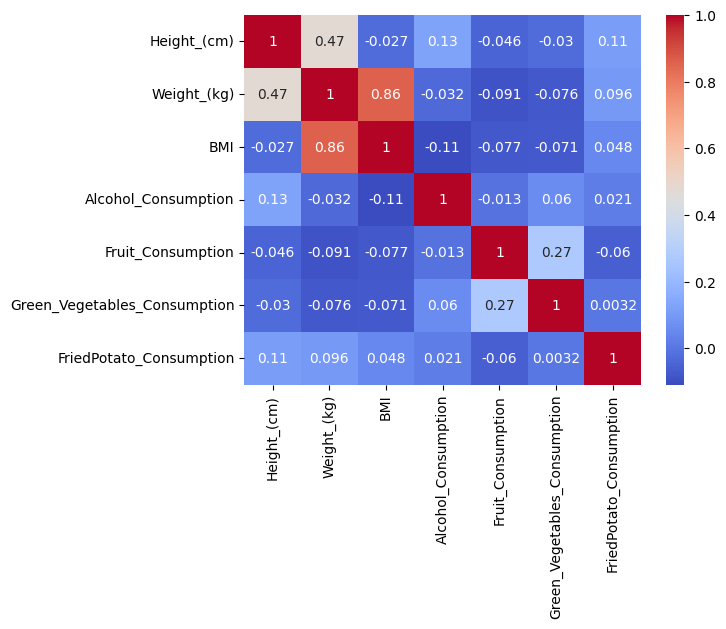

In [37]:
#cvd_df.corr(numeric_only=True)
sns.heatmap(cvd_df.corr(numeric_only=True), annot=True, cmap='coolwarm');

Os dados não possuem grande correlação, o peso e o bmi naturalmente têm uma boa correlação visto que o BMI é uma medida que depende diretamente do peso da pessoa, bem como o peso e a altura pois geralmente individuos mais altos pesam mais. Também podemos ver uma correlação significante na taxa de consumo de frutas com a de vegetais e verduras.

## Visualização do dataset

### Visualização e análise de dados numéricos

**BoxPlot**

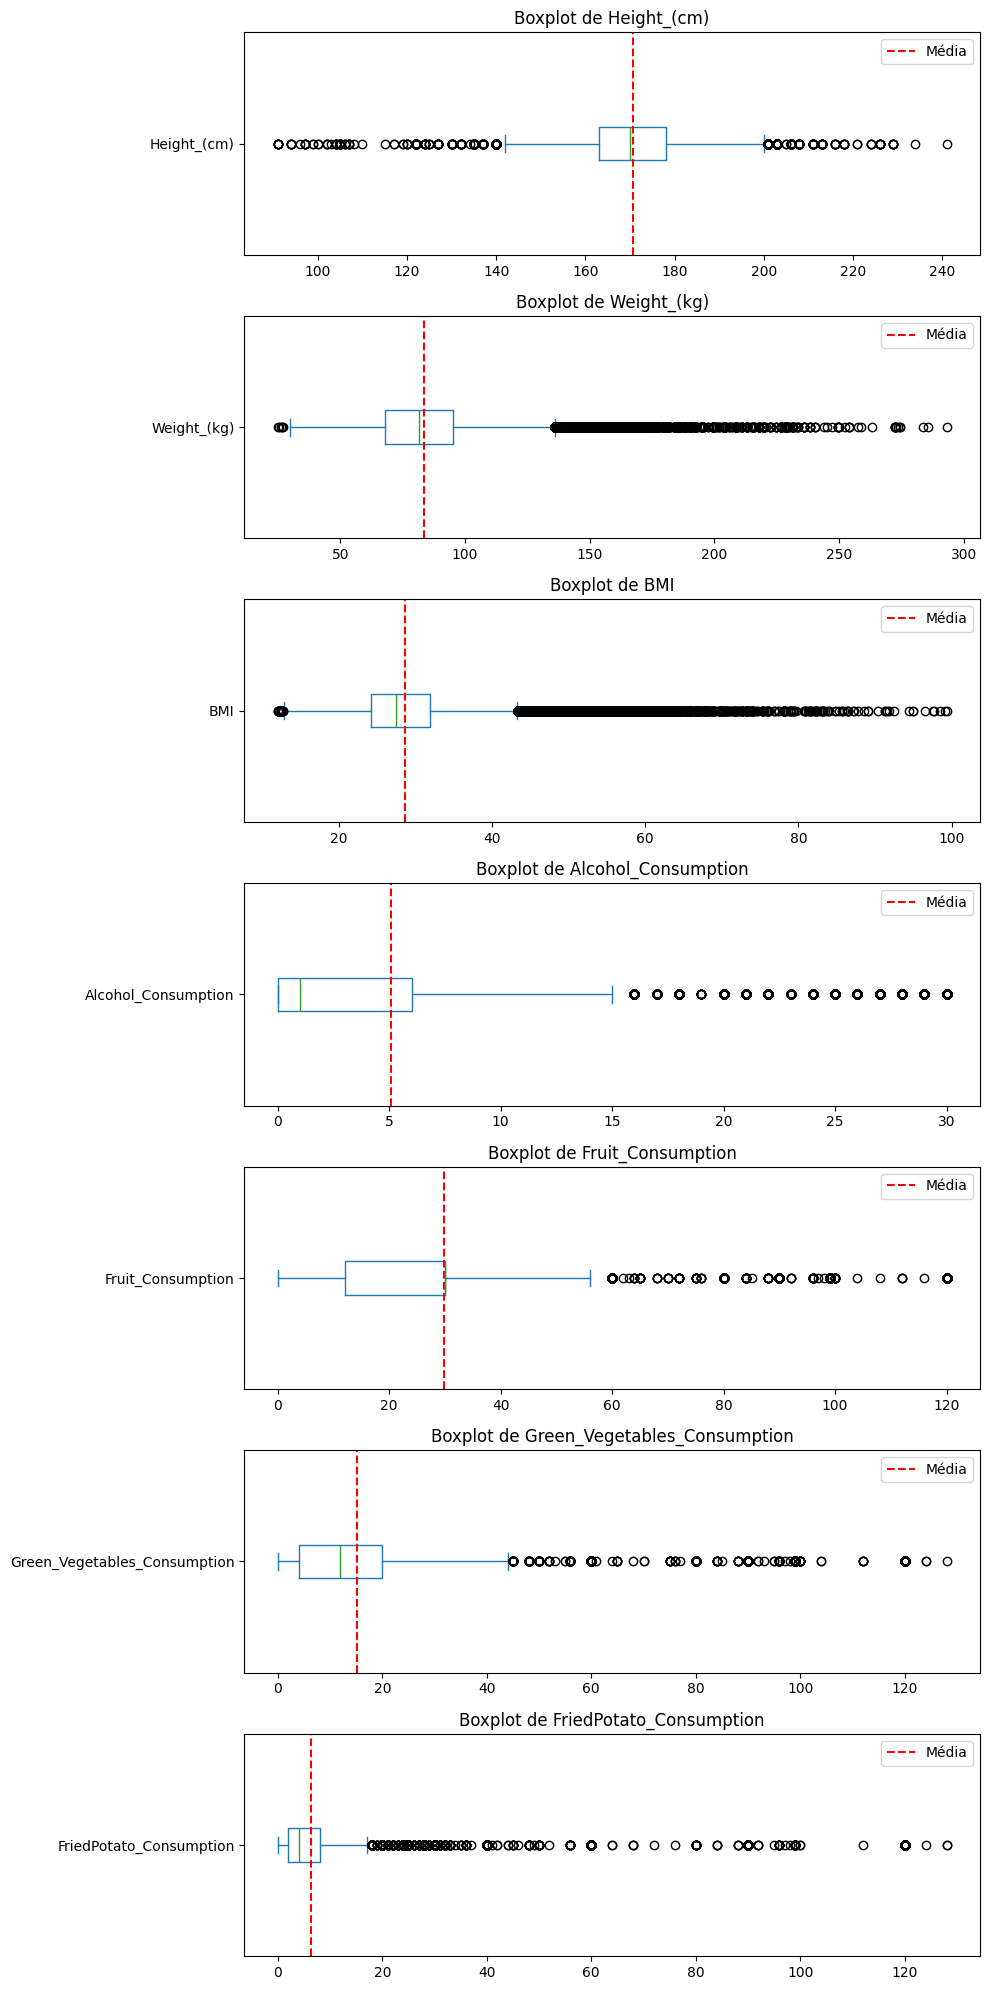

In [38]:
continuous_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(10, 20))

for ax, var in zip(axes, continuous_vars):
    cvd_df[var].plot(kind='box', vert=False, ax=ax)
    ax.axvline(cvd_df[var].mean(), color='red', linestyle='--', label='Média')
    ax.set_title(f'Boxplot de {var}')
    ax.legend()

plt.tight_layout()
plt.show()

Numa primeira análise verificam se possíveis outliers ao longo de todos os nossos dados numericos.

**Gráficos de Densidade**

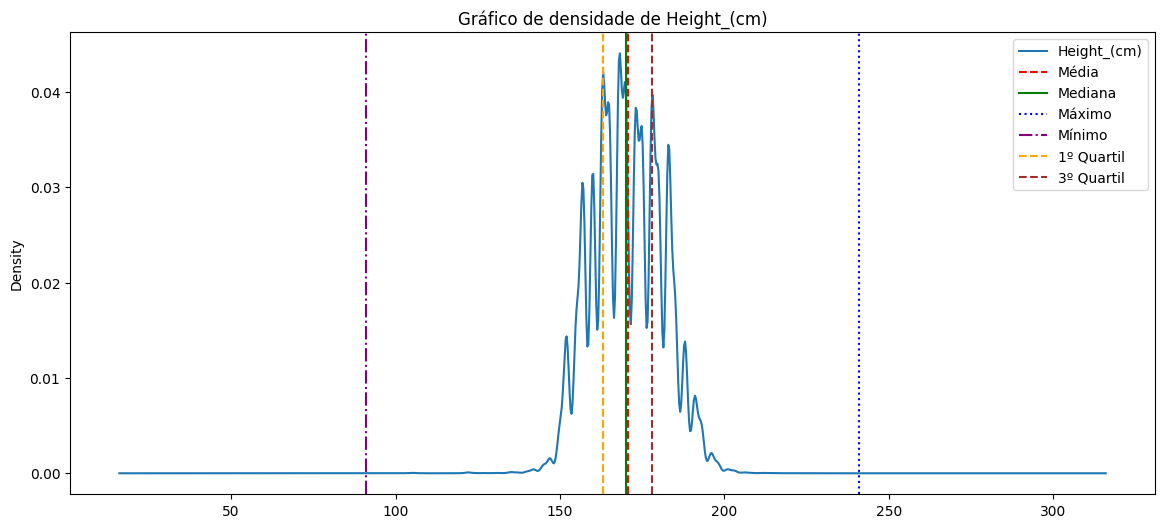

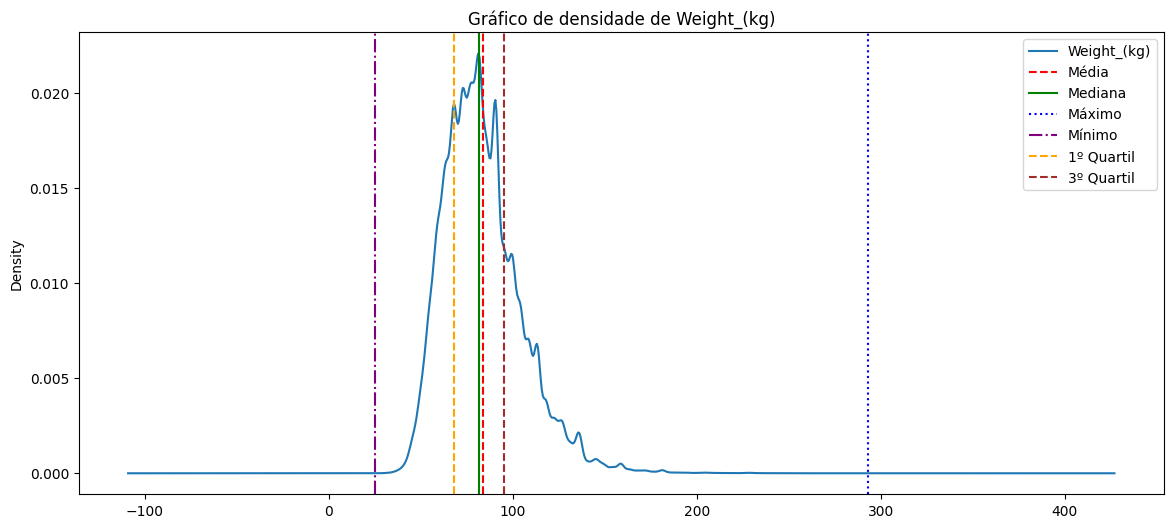

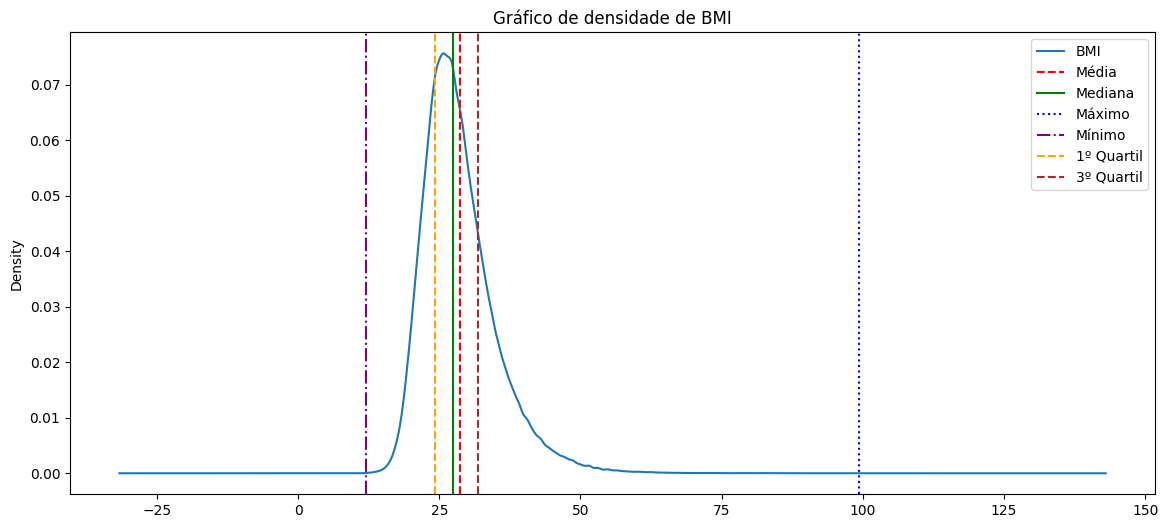

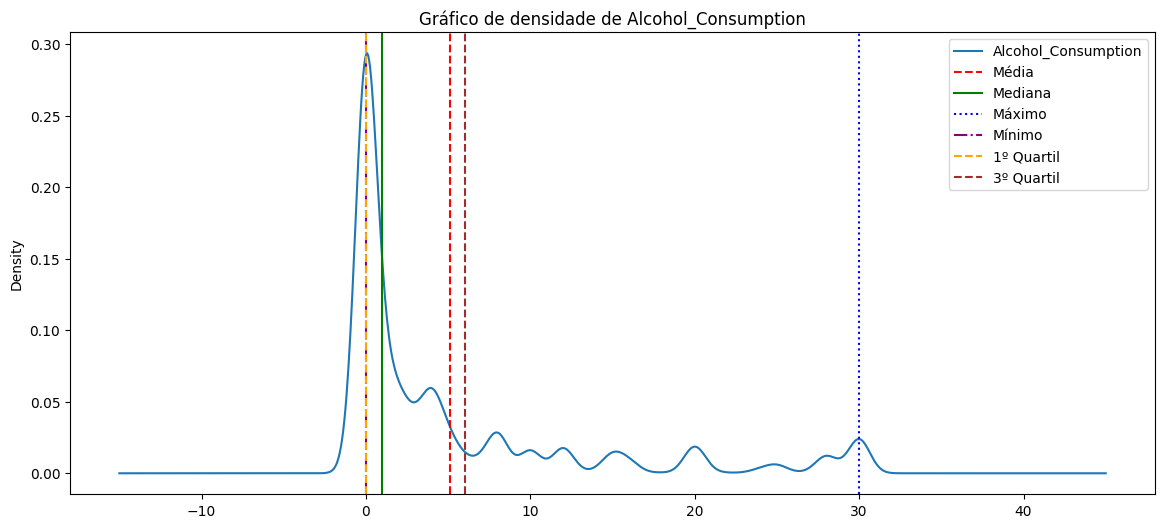

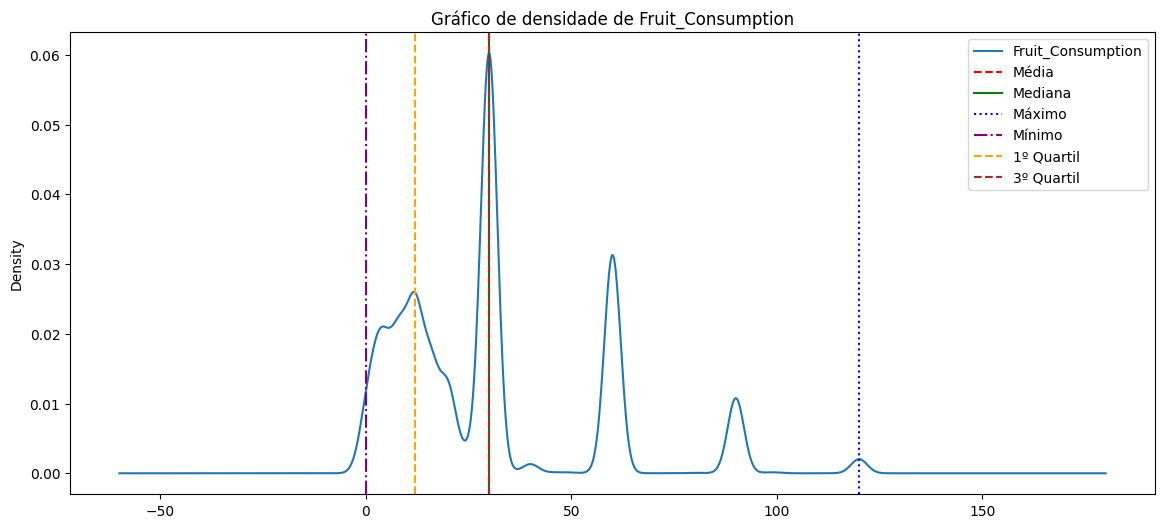

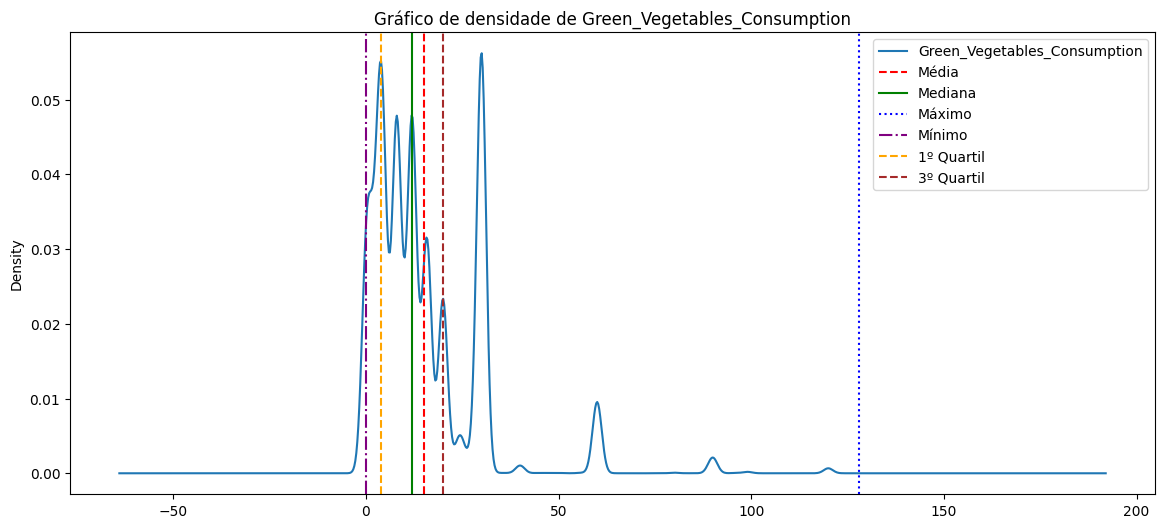

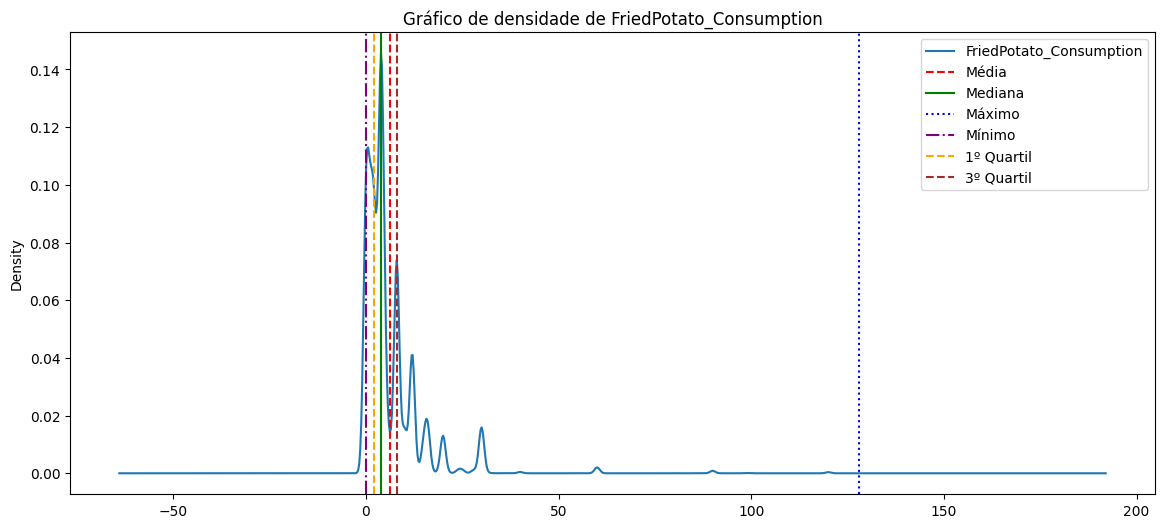

In [39]:
for var in continuous_vars:
    ax = cvd_df[var].plot(kind='density', figsize=(14, 6))
    ax.axvline(cvd_df[var].mean(), color='red', linestyle='--', label='Média')
    ax.axvline(cvd_df[var].median(), color='green', linestyle='-', label='Mediana')
    ax.axvline(cvd_df[var].max(), color='blue', linestyle=':', label='Máximo')
    ax.axvline(cvd_df[var].min(), color='purple', linestyle='-.', label='Mínimo')
    ax.axvline(cvd_df[var].quantile(0.25), color='orange', linestyle='--', label='1º Quartil')
    ax.axvline(cvd_df[var].quantile(0.75), color='brown', linestyle='--', label='3º Quartil')
    plt.title(f'Gráfico de densidade de {var}')
    plt.legend()
    plt.show()

Os dados estao muito mal distruidos. A partir da analise destes graficos de densidade conseguimos perceber melhor a distriuição dos nossos dados.E concluímos que aqueles valores de peso, altura e BMI(BMI > 60 por exemplo) de facto não estão de acordo com a distribuição dos restantes. Então devido a dimensão do nosso dataset decidimos eliminálos por completo. Tendo em conta as variáveis de consumo vamos tentar normaliza las ou reduzilas para encontrar uma solucao que se molde e faça sentido para o nosso estudo.

In [40]:
outliers_count = {}

for var in continuous_vars:
    Q1 = cvd_df[var].quantile(0.25)
    Q3 = cvd_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cvd_df[(cvd_df[var] < lower_bound) | (cvd_df[var] > upper_bound)]
    outliers_count[var] = outliers.shape[0]

print(outliers_count.sum)

AttributeError: 'dict' object has no attribute 'sum'

**Histogramas**

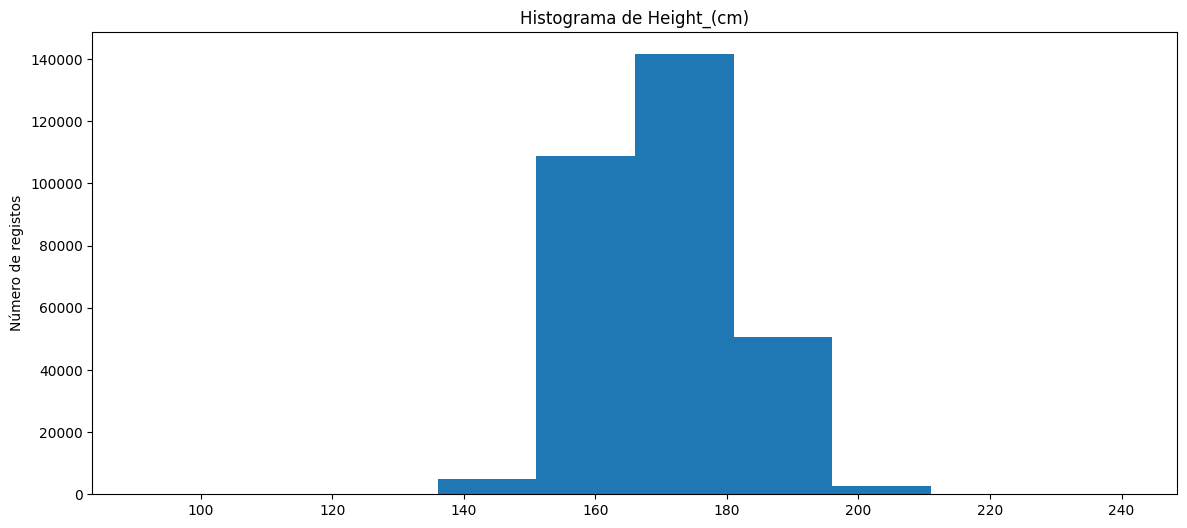

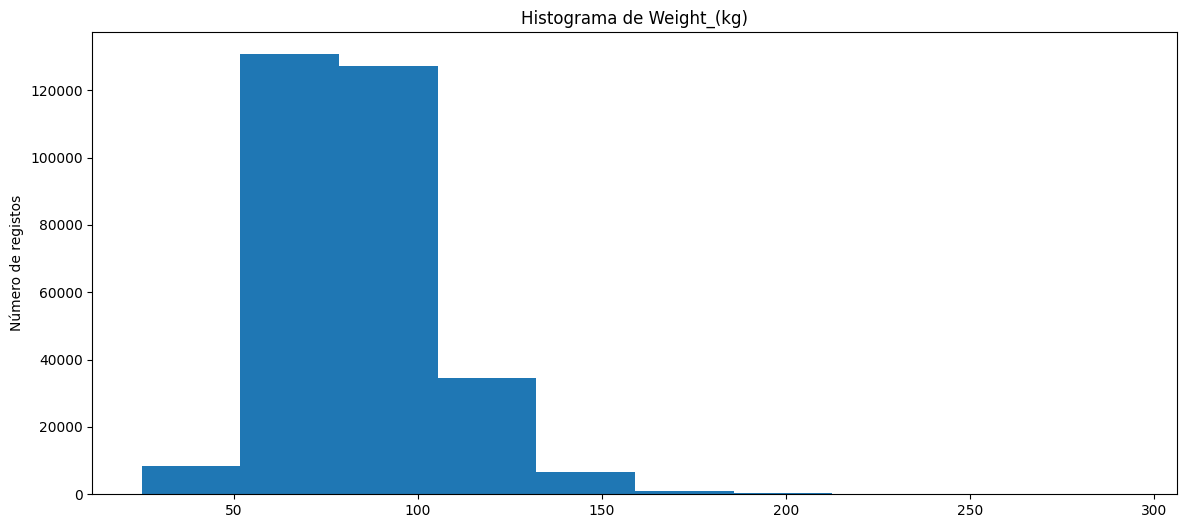

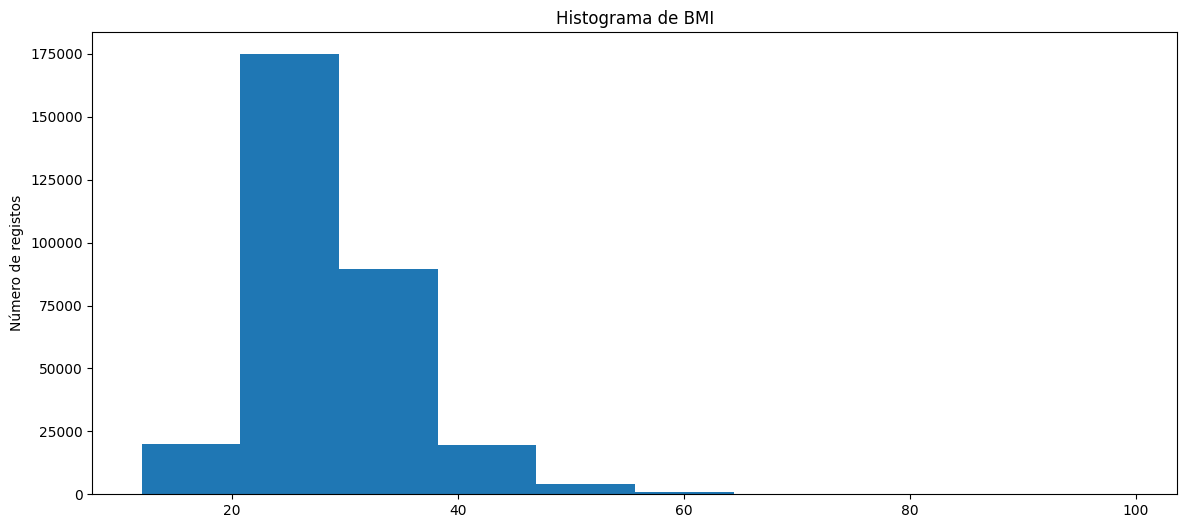

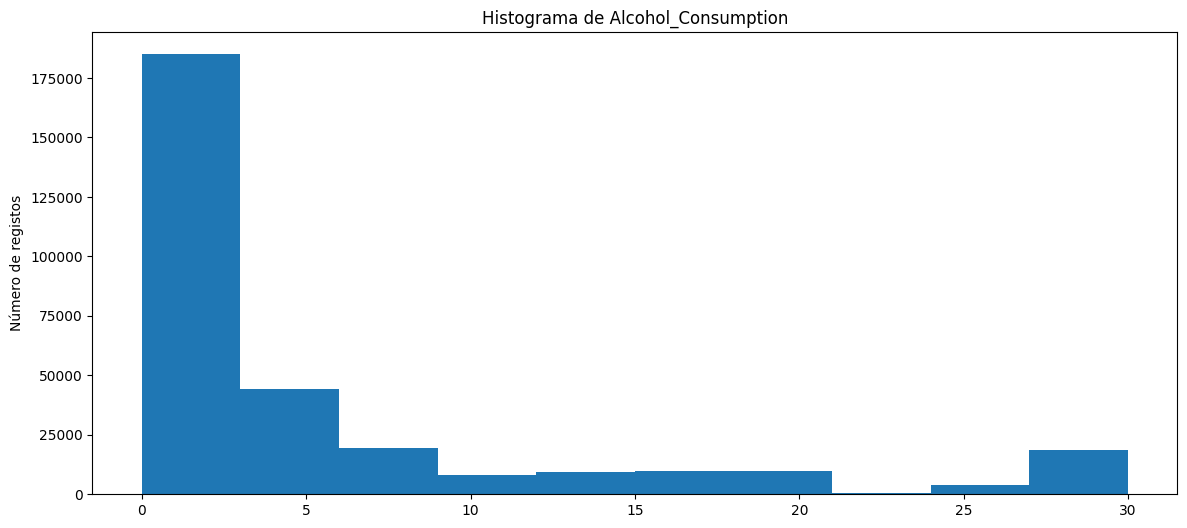

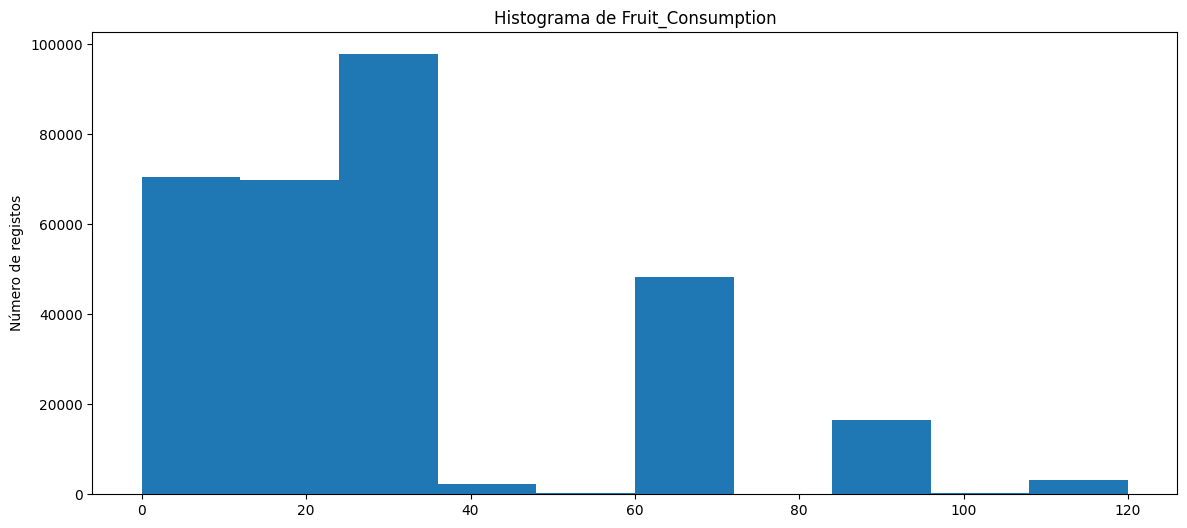

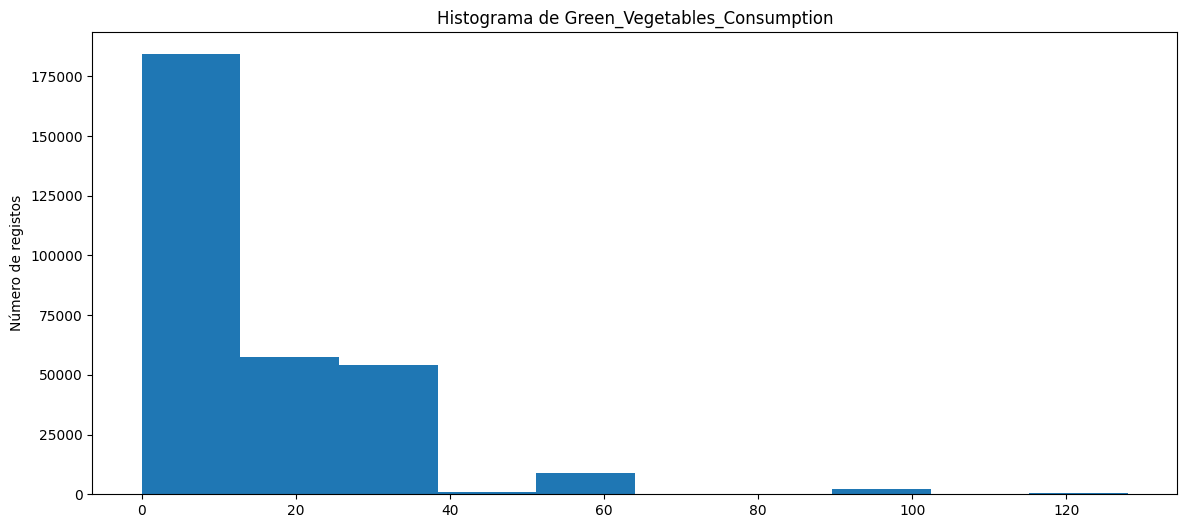

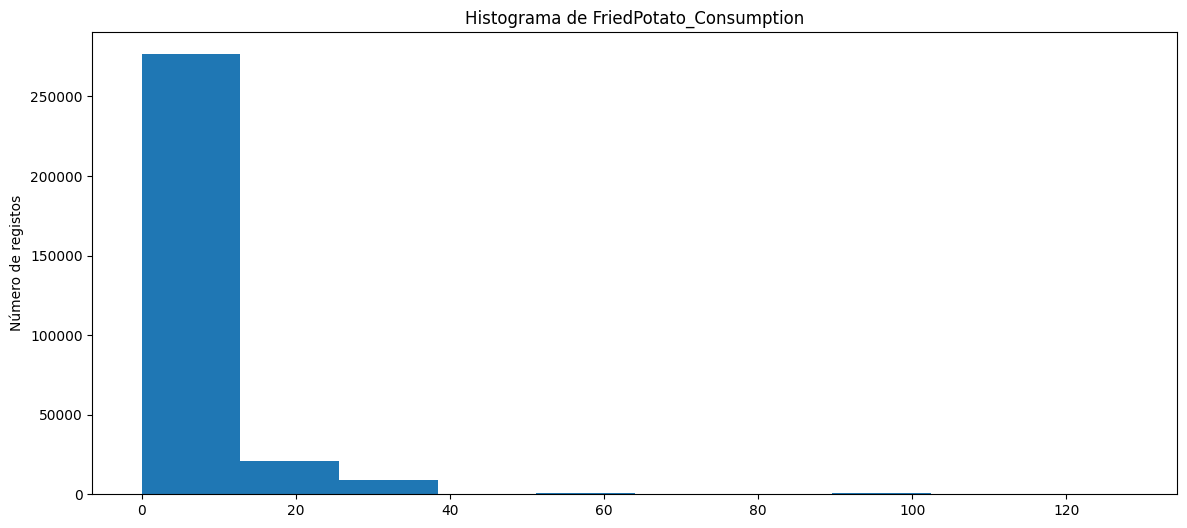

In [11]:
for var in continuous_vars:
    ax = cvd_df[var].plot(kind = 'hist', figsize = (14, 6))
    ax.set_ylabel('Número de registos')
    # plt.boxplot(cvd_df[var], vert=False)
    plt.title(f'Histograma de {var}')
    # plt.xlabel(f'Valores de {var}')
    plt.show()

Tiramos as mesmas conclusões que nos gráficos anteriores.

### Visualização e análise de dados categoricos

In [12]:
discrete_vars = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


for var in discrete_vars:
    print(f'{cvd_df[var].value_counts()}\n')

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

Exercise
Yes    239381
No      69473
Name: count, dtype: int64

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

Skin_Cancer
No     278860
Yes     29994
Name: count, dtype: int64

Other_Cancer
No     278976
Yes     29878
Name: count, dtype: int64

Depression
No     246953
Yes     61901
Name: count, dtype: int64

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

Arthritis
No     207783
Yes    101071
Name: count, dtype: int64

Sex
Fe

Para obtermos dados mais uniformes vamos ter de alterar os valores para os diabetes, 'No, pre-diabetes or borderline diabetes' e 'Yes, but female told only during pregnancy'

**Gráficos de Barras**

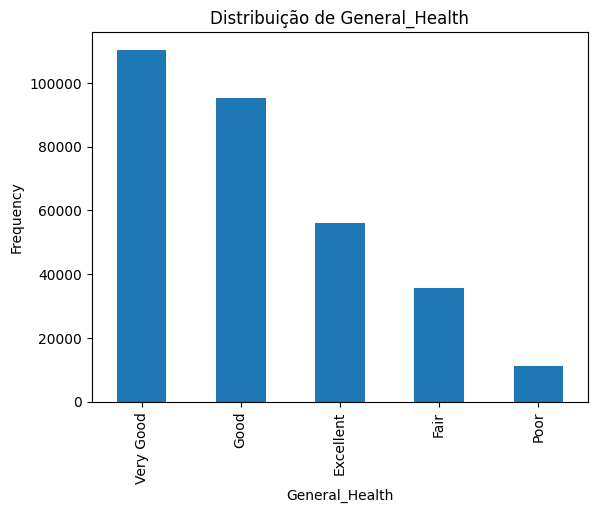

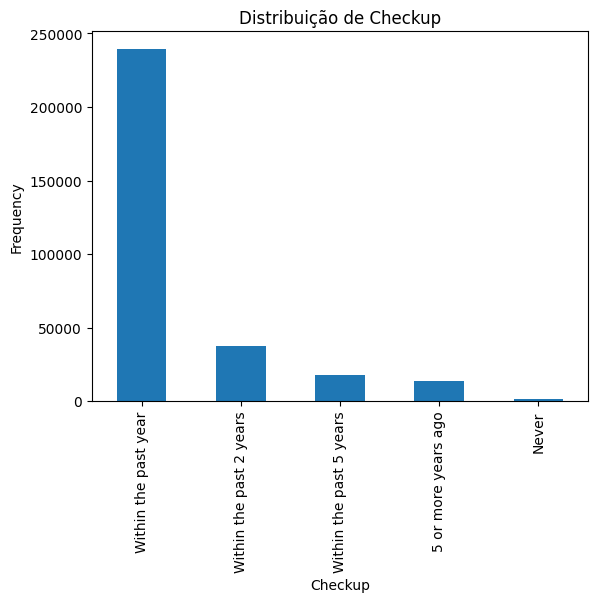

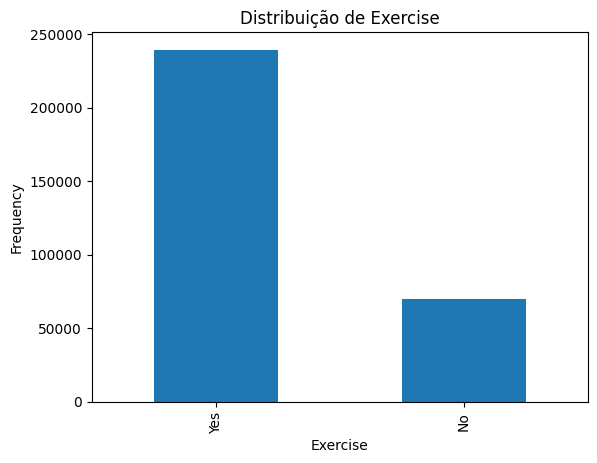

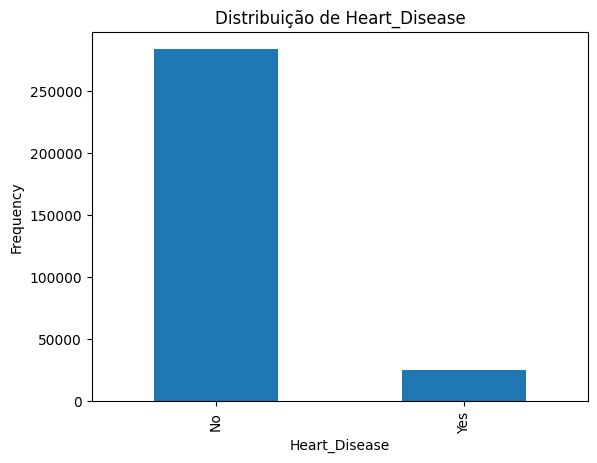

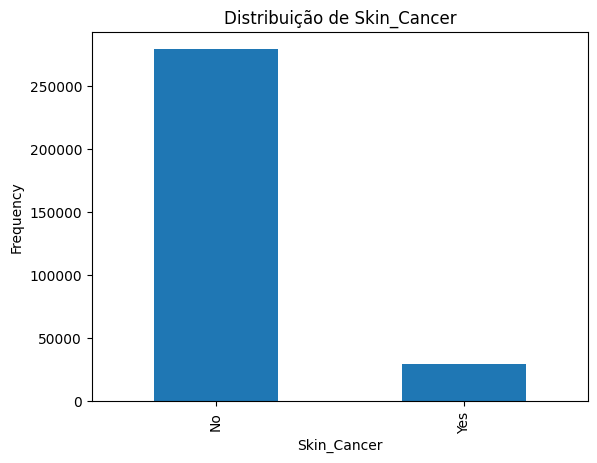

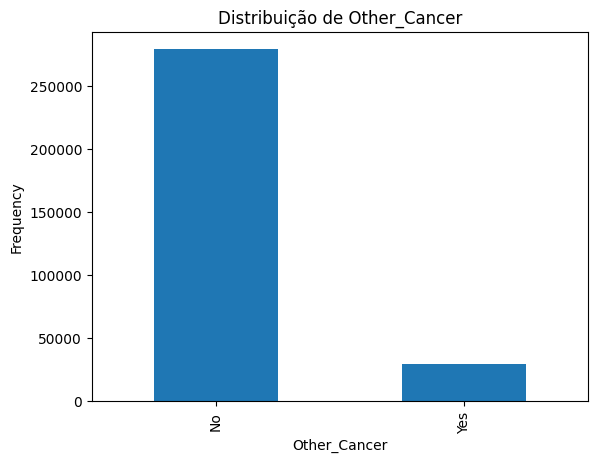

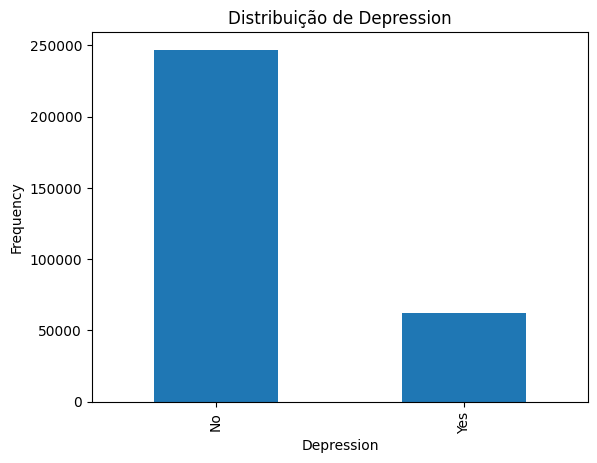

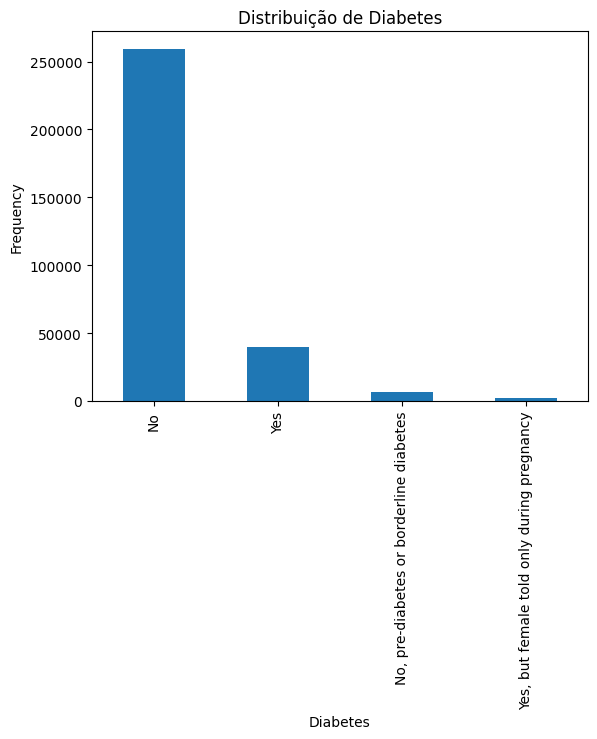

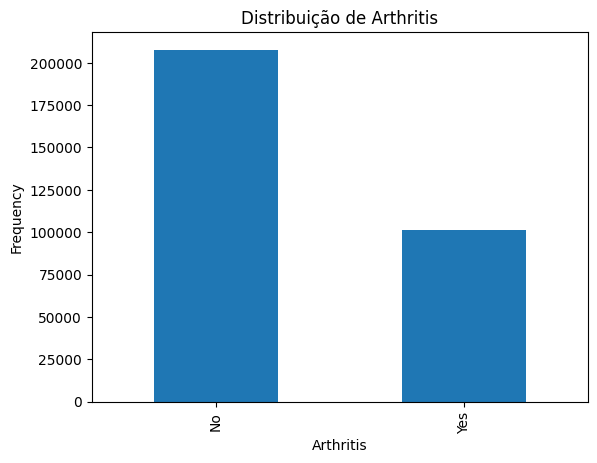

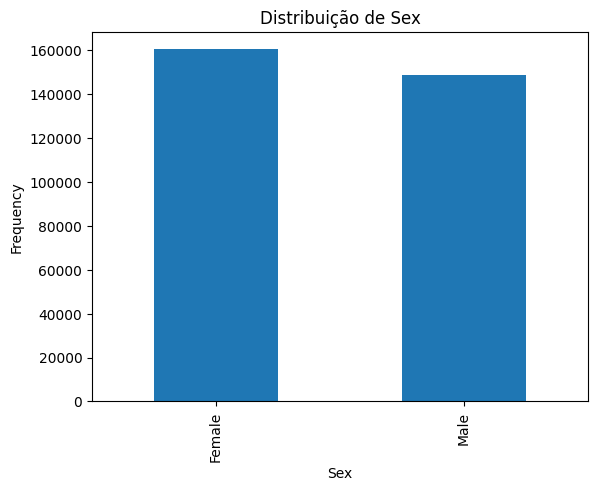

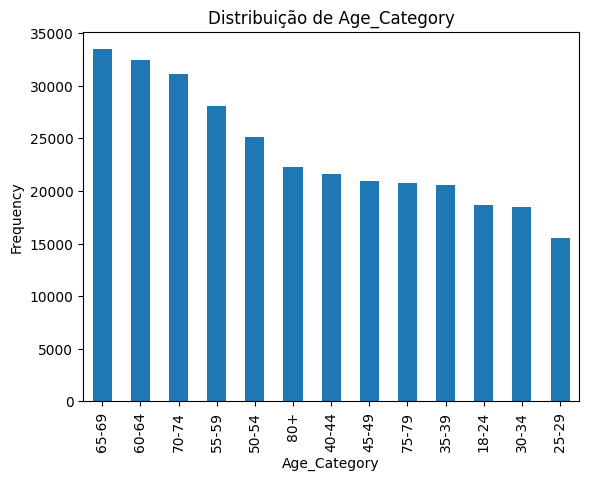

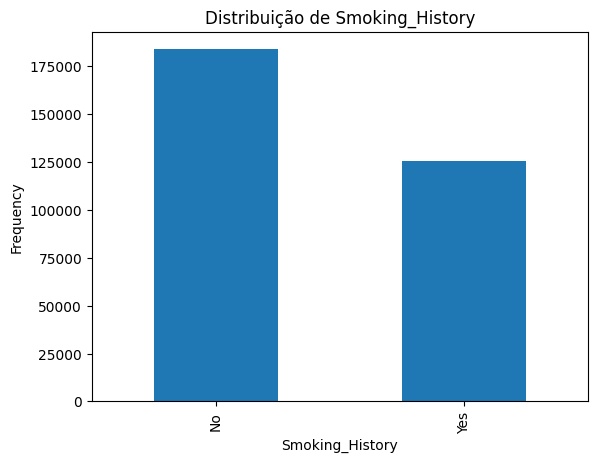

In [13]:
for var in discrete_vars:
    cvd_df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

**Gráficos Pizza**

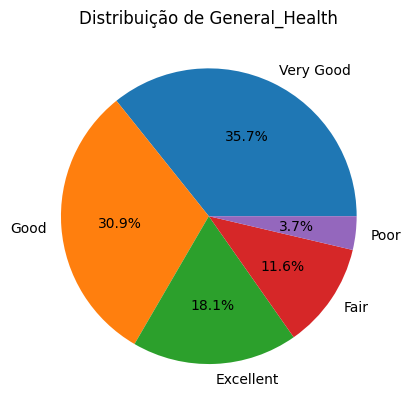

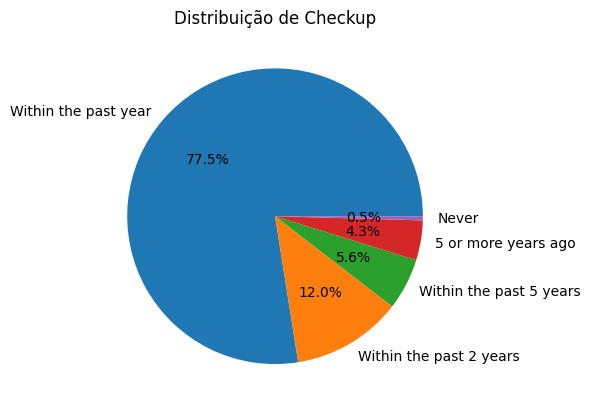

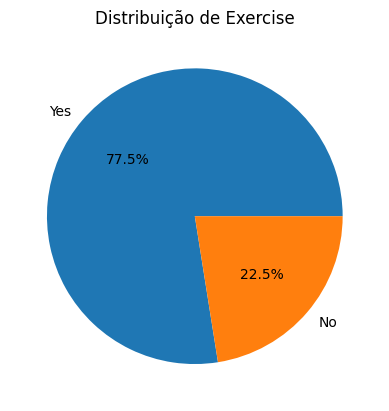

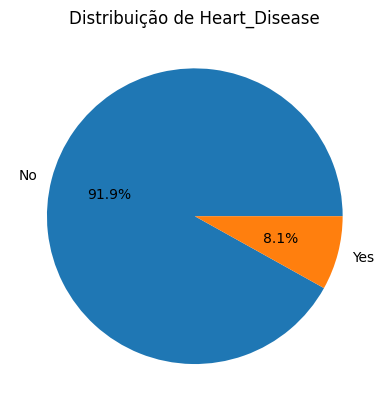

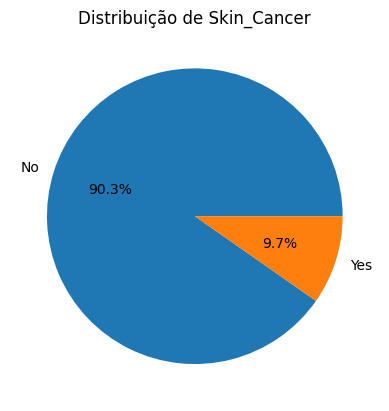

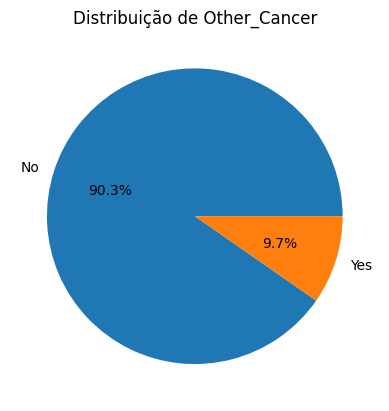

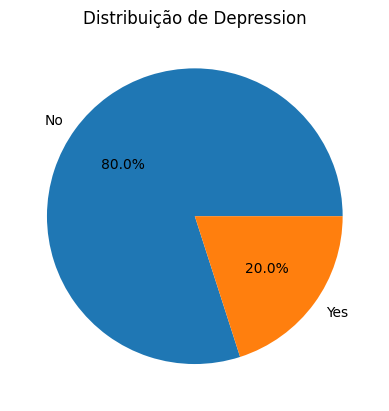

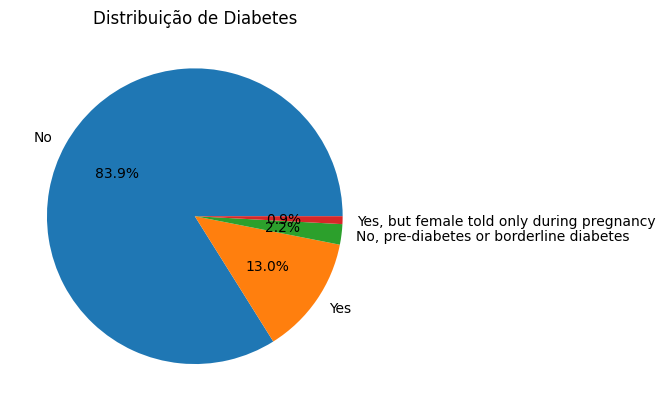

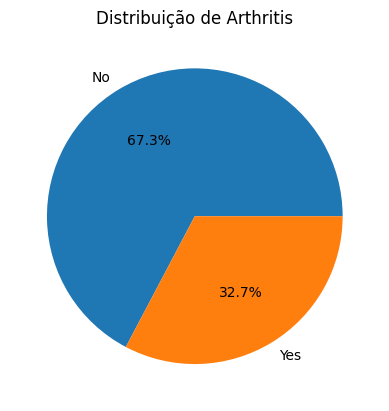

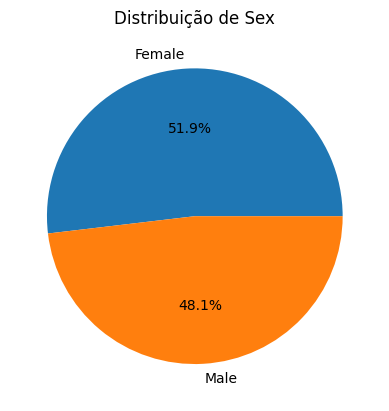

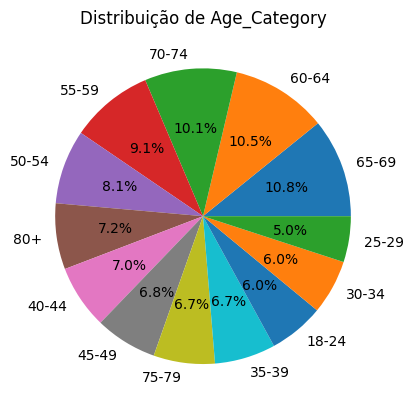

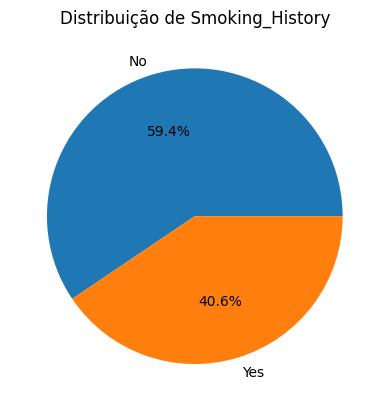

In [14]:
for var in discrete_vars:
    cvd_df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribuição de {var}')
    plt.ylabel('')
    plt.show()


Mais uma vez verificamos uma distribuição muito pobre dos nossos dados. Apenas as colunas Age_Category, Sex e Smoking_History apresentam uma boa distribuição.

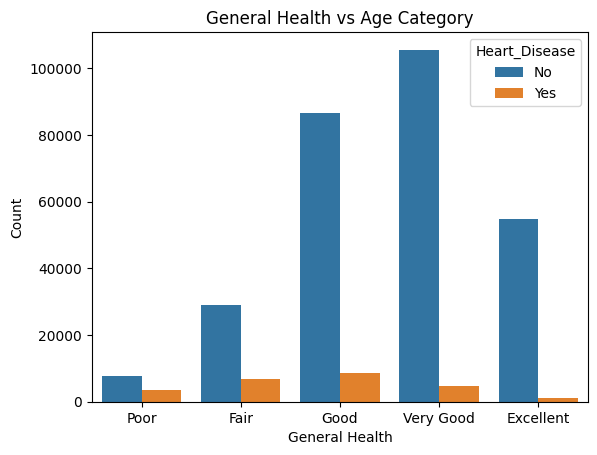

In [15]:
# Definir a ordem das categorias
order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
cvd_df['General_Health'] = pd.Categorical(cvd_df['General_Health'], categories=order, ordered=True)

# Plotar o gráfico
sns.countplot(data=cvd_df, x='General_Health', hue='Heart_Disease')
plt.title('General Health vs Age Category')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

Seria de esperar que pessoas com piores condições de saúde fossem mais propícias a estas doenças, mas com este gráfico conseguimos ver que nem sempre é o caso.

In [41]:
cvd_df['Cancer'] = cvd_df.apply(lambda row: 'Yes' if row['Skin_Cancer'] == 'Yes' or row['Other_Cancer'] == 'Yes' else 'No', axis=1)
cvd_df['Cancer'] = pd.Categorical(cvd_df['Cancer'], categories=['No', 'Yes'], ordered=True)
cvd_df['Cancer']

0         No
1         No
2         No
3         No
4         No
          ..
308849    No
308850    No
308851    No
308852    No
308853    No
Name: Cancer, Length: 308854, dtype: category
Categories (2, object): ['No' < 'Yes']

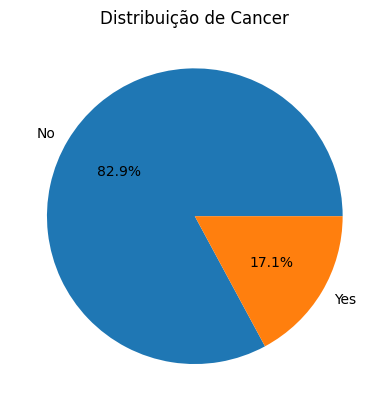

In [42]:
cvd_df['Cancer'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Cancer')
plt.ylabel('')
plt.show()

Experimentámos juntar as duas colunas do cancro para ver se melhorava a distribuição deste dados, para facilitar a análise, mas não foi o caso.

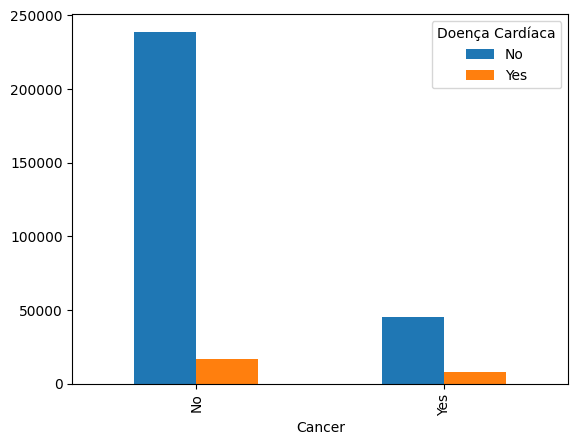

In [43]:
contingency_table = pd.crosstab(cvd_df['Cancer'], cvd_df['Heart_Disease'])

contingency_table.plot(kind='bar', stacked=False)
plt.legend(title='Doença Cardíaca')
plt.show()

O facto de um individuo ter ou não cancro não diz muito sobre os CVD's.

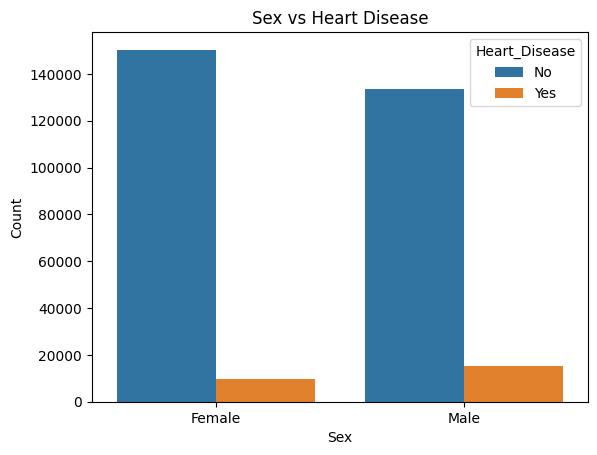

In [38]:
sns.countplot(data=cvd_df, x='Sex', hue='Heart_Disease')
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Podemos ver que as CVD são mais propícias nos homens, isto é um bom indicativo que o sexo do indivíduo tem um impacto no desenvolvimento de CVD.

In [36]:
# Criar uma cópia do dataframe original
cvd_df_filtered = cvd_df.copy()

# Encontrar a moda da coluna Diabetes
moda_diabetes = cvd_df['Diabetes'].mode()[0]

# Substituir valores diferentes de "Yes" e "No" pela moda
cvd_df_filtered['Diabetes'] = cvd_df['Diabetes'].apply(lambda x: x if x in ['Yes', 'No'] else moda_diabetes)

# Verificar os valores únicos na coluna Diabetes após a substituição
print(cvd_df_filtered['Diabetes'].value_counts())

Diabetes
No     268683
Yes     40171
Name: count, dtype: int64


Visto que o diabetes possuía valores sem ser 'Yes' ou 'No', optamos por substituir tudo o que não seguisse este tipo de resposta pela moda, visto que é o valor menos afetado por outliers.

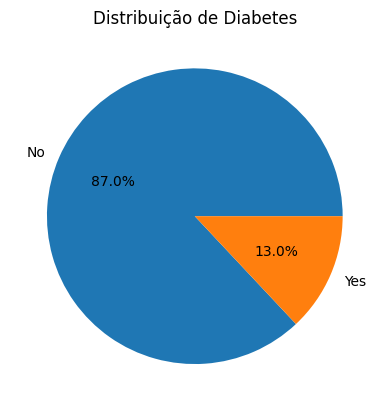

In [37]:
cvd_df_filtered['Diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Distribuição de Diabetes')
plt.ylabel('')
plt.show()

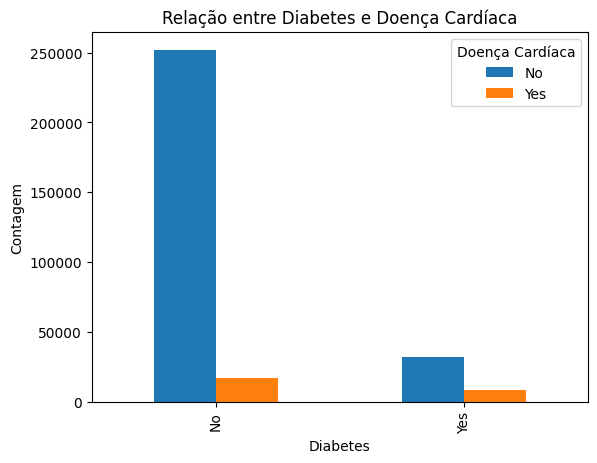

In [46]:
contingency_table_diabetes_hd = pd.crosstab(cvd_df_filtered['Diabetes'], cvd_df_filtered['Heart_Disease'])


contingency_table_diabetes_hd.plot(kind='bar')
plt.title('Relação entre Diabetes e Doença Cardíaca')
plt.xlabel('Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca')
plt.show()

Com este gráfico não conseguimos tirar grandes conclusões devido à má distribuição dos dados.

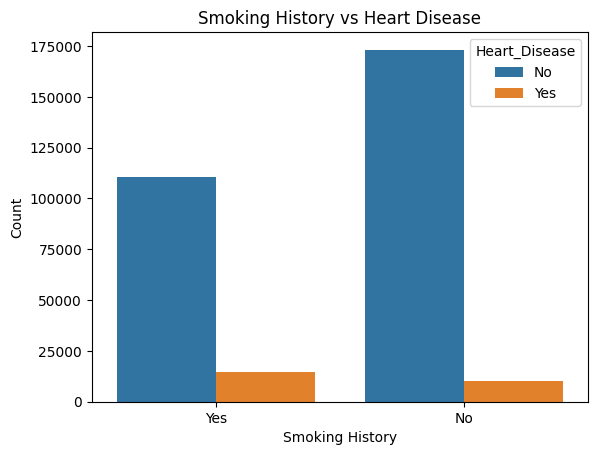

In [45]:
sns.countplot(data=cvd_df, x='Smoking_History', hue='Heart_Disease')
plt.title('Smoking History vs Heart Disease')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

Conseguimos ver uma certa relação no histórico de fumador do indivíduo e os CVD's, tendo em conta a má distribuição destes dados.